## Data Wrangling <a id='Contents'></a>
* [Introduction](#Introduction)
* [Import Packages](#Import_packages)
* [Load and preview data](#Load_Data)
    * [Examine Categorical Features](#Categorical)
    * [Examine Numerical Features](#Numerical)    

## Introduction  <a id = 'Introduction'></a>

In this notebook, I will explore and analyze the dataset for loan defaulters. The goal of this analysis is, in these current economic conditions, how can Investment Partners Bank use Machine Learning to build an advanced predictive model to analyze historical data to identify potential default risks, so that by the end of the next Fiscal Year, that bank has reduced the current loan default rate from 20% to under 8%, for all loans that exceed $50,000.00.

#### Background

The financial industry faces an ongoing challenge in effectively managing the risk associated with loan defaults. Unpredictable economic conditions and shifting borrower behaviors make it imperative for lending institutions to adopt proactive strategies for safeguarding their financial stability. The lack of a systematic and data-driven approach to predict loan defaults hinders the ability to make informed lending decisions, resulting in potential financial losses and a strain on sustainable financial practices.

Through the implementation of SecureLend project, the Investment Partners Bank hope to proactively identify high-risk loan applications, implement targeted risk mitigation strategies, and ultimately contribute to the establishment of sustainable financial practices. This project aims to revolutionize the way the bank approach risk management, enabling them to make responsible and informed lending decisions in an ever-evolving financial landscape.


#### The Dataset
The dataset has 18 features (columns) and 255,347 rows of historical data of loan records. The feature "Default" indicates whther the loan defaulted (1) or not (0).

#### Objectives

The primary objectives of this analysis are:

1. Objective 1:Explore the distribution of key variables
2. Objective 2:Investigate the distribution of key variables.
3. Objective 3: Make sure the data is clean, complete, and meet the initial quality requirements - no siginificant anomalies, outliers and no missing values. Essentaily making the dataset ready for Exploratory Data Analysis (EDA) 

#### Tools and Libraries

I will use Pandas, numpy for exploratory tasks and user matplotlip and seaborn for visualization.



## Import Packages <a id = 'Import_packages'></a>

In [1]:
#Import Packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Load and preview data  <a id = 'Load_Data'></a>

In [2]:
#Load Data
dataset = pd.read_csv('Loan_default.csv')

In [3]:
dataset.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
dataset.shape

(255347, 18)

In [5]:
dataset.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
#Explicitly Check for missing values
missing = pd.concat([dataset.isnull().sum(), 100 * dataset.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing = missing.sort_values(by='count', ascending=False)
missing

,count,%
LoanID,0,0.0
Age,0,0.0
HasCoSigner,0,0.0
LoanPurpose,0,0.0
HasDependents,0,0.0
HasMortgage,0,0.0
MaritalStatus,0,0.0
EmploymentType,0,0.0
Education,0,0.0
DTIRatio,0,0.0


This assures that the data set does not have any missing values

### Examine Categorical Features <a id = 'Categorical'></a>

In [8]:
#Checking for inconsistencies
print(dataset['Education'].unique())
print(dataset['MaritalStatus'].unique())
print(dataset['EmploymentType'].unique())
print(dataset['LoanPurpose'].unique())


["Bachelor's" "Master's" 'High School' 'PhD']
['Divorced' 'Married' 'Single']
['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
['Other' 'Auto' 'Business' 'Home' 'Education']


In [9]:
#Education
dataset['Education'].value_counts()

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64

In [10]:
# MaritalStatus
dataset['MaritalStatus'].value_counts()

Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64

In [11]:
#Loan Purpose
dataset['LoanPurpose'].value_counts()

Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64

In [12]:
#Employment Type
dataset['EmploymentType'].value_counts()

Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64

### Examine Numerical Features <a id = 'Numerical'></a>

In [13]:
# Summary Statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


**1.	Age:**
-  The average age is approximately 43.5 years.
-  The age values vary around the mean by approximately 15 years.
-  The minimum age is 18 years and aximum age is 69 years.
-  25% of the individuals are below the age of 31.
-  The median age is 43 years.
-  75% of the individuals are below the age of 56.
</br>
</br>

**2.	Income:**
-  The average income is approximately 82,499.
-  Incomes vary around the mean by approximately $38,963.
-  The minimum income is 15,000 and maximum income is 149,999.
-  25% of the individuals have an income below 48,825.50.
-  The median income is 82,466.
-  75% of the individuals have an income below 116,219.
</br>
</br>

**3.	Loan Amount:**
-  The average loan amount is approximately 127,579.
-  Loan amounts vary around the mean by approximately 70,840.
-  The minimum loan amount is 5,000 and maximum loan amount is 249,999.
-  25% of the loans have amounts below 66,156.
-  The median loan amount is 127,556.
-  75% of the loans have amounts below 188,985.
</br>
</br>

**4.	Loan Term:**
-  The average loan term is approximately 36.03 months.
-  Loan terms vary around the mean by approximately 16.97 months.
-  The minimum loan term is 12 months and maximum loan term is 60 months.
-  25% of the loans have terms below 24 months.
-  The median loan term is 36 months.
-  75% of the loans have terms below 48 months.

Visualize The numerical data spread

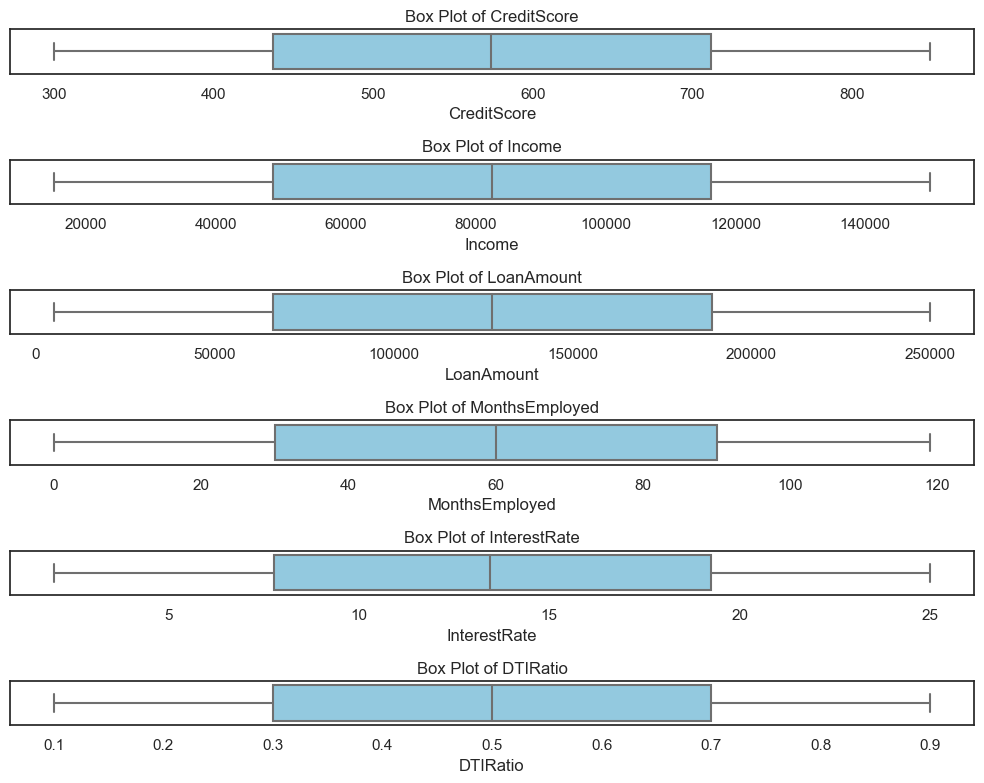

In [14]:
selected_columns = ['CreditScore', 'Income', 'LoanAmount', 'MonthsEmployed', 'InterestRate', 'DTIRatio']

# Select the subset of columns for exploration
selected_data = dataset[selected_columns]

# Set the style of seaborn
sns.set(style="white")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=1, figsize=(10, 8))

# Draw box plots for each selected column
for i, column in enumerate(selected_columns):
    sns.boxplot(x=selected_data[column], ax=axes[i], orient='h', color='skyblue')
    axes[i].set_title(f'Box Plot of {column}')

# Adjust the layout
plt.tight_layout()

# Show plot
plt.show()


Based on these box plots, I do not see anomalies and signigicant outliers. 

The next step is Exploratory Data Analysis, in which I will explore the dataset to find patterns and gain more indepth insights into the data. The findings in the EDA will assist in the preparation for data modeling.